In [1]:
import os
import numpy as np
from PIL import Image
from imageio import imread
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#this is google pretrained model
import tf_slim as slim
from tf_slim.nets import inception
import tf_slim as slim
import cv2
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
ckpt_path = r"input/inception_v3.ckpt"
images_path = r"input/pics/*"
img_width = 299
img_height = 299
batch_size = 16
batch_shape = [batch_size, img_height, img_width, 3]
num_classes = 1001
predict_output = []
class_names_path = "class_name.txt"
with open(class_names_path) as f:
    class_names = f.readlines()

In [3]:
X = tf.placeholder(tf.float32, shape=batch_shape)

with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(
        X, num_classes=num_classes, is_training=False
    )

predictions = end_points["Predictions"]
saver = tf.train.Saver(slim.get_model_variables())

Instructions for updating:
Please use `layer.__call__` method instead.


In [4]:
def load_images(input_dir):
    global batch_shape
    images = np.zeros(batch_shape)
    filenames = []
    idx = 0
    batch_size = batch_shape[0]
    files = tf.gfile.Glob(input_dir)[:12]    
    for filepath in files:
        print(filepath)
        with tf.gfile.Open(filepath, "rb") as f:
            imgRaw = np.array(Image.fromarray(imread(f, as_gray=False, pilmode="RGB")).resize((299, 299))).astype(np.float) / 255.0
        images[idx, :, :, :] = imgRaw * 2.0 - 1.0
        filenames.append(os.path.basename(filepath))
        idx += 1
        if idx == batch_size:
            yield filenames, images
            filenames = []
            images = np.zeros(batch_shape)
            idx = 0
    if idx > 0:
        yield filenames, images

In [5]:
session_creator = tf.train.ChiefSessionCreator(
        scaffold=tf.train.Scaffold(saver=saver),
        checkpoint_filename_with_path=ckpt_path,
        master='')

In [6]:
with tf.train.MonitoredSession(session_creator=session_creator) as sess:
    for filenames, images in load_images(images_path):
        labels = sess.run(predictions, feed_dict={X: images})
        for filename, label, image in zip(filenames, labels, images):
            predict_output.append([filename, label, image])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from input/inception_v3.ckpt
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
input\pics\1 duV0NU-s_Ngm7U50bqu-4A.jpeg
input\pics\1200px-Mushroom-IMG_3300.JPG
input\pics\1574398229990.jpeg
input\pics\171026-better-coffee-boost-se-329p_67dfb6820f7d3898b5486975903c2e51.fit-760w.jpg
input\pics\1800x1200_dog_breed_health_issues_slideshow.jpg
input\pics\1800x1200_dog_cool_summer_other.jpg
input\pics\banner-small-garbage-day_402x-1.jpg
input\pics\blacks-postal-pro-post-mount-mailboxes-pp1000blm-31_1000.jpg
input\pics\golden-retriever-royalty-free-image-506756303-1560962726.jpg
input\pics\https _cdn.cnn.com_cnnnext_dam_assets_150929101049-black-coffee-stock.jpg
input\pics\index.jpg
input\pics\man-city-urban-walking-serious-732x549-thumbnail.jpg


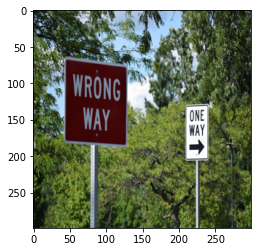

Filename: 1 duV0NU-s_Ngm7U50bqu-4A.jpeg
Displaying the top 5 Predictions for above image:
n06794110 street sign
n06874185 traffic light, traffic signal, stoplight
n03976657 pole
n04604644 worm fence, snake fence, snake-rail fence, Virginia fence
n04149813 scoreboard


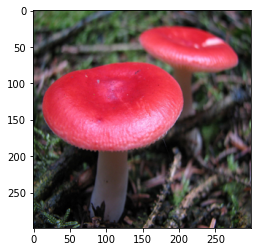

Filename: 1200px-Mushroom-IMG_3300.JPG
Displaying the top 5 Predictions for above image:
n07734744 mushroom
n12998815 agaric
n13044778 earthstar
n13052670 hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa
n13040303 stinkhorn, carrion fungus


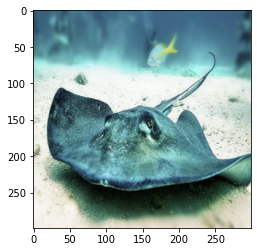

Filename: 1574398229990.jpeg
Displaying the top 5 Predictions for above image:
n01498041 stingray
n01496331 electric ray, crampfish, numbfish, torpedo
n04208210 shovel
n03967562 plow, plough
n01685808 whiptail, whiptail lizard


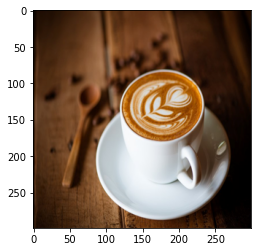

Filename: 171026-better-coffee-boost-se-329p_67dfb6820f7d3898b5486975903c2e51.fit-760w.jpg
Displaying the top 5 Predictions for above image:
n07920052 espresso
n04597913 wooden spoon
n07930864 cup
n03297495 espresso maker
n02776631 bakery, bakeshop, bakehouse


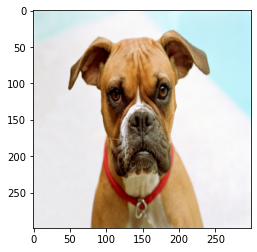

Filename: 1800x1200_dog_breed_health_issues_slideshow.jpg
Displaying the top 5 Predictions for above image:
n02108089 boxer
n02108422 bull mastiff
n02108915 French bulldog
n02096585 Boston bull, Boston terrier
n03803284 muzzle


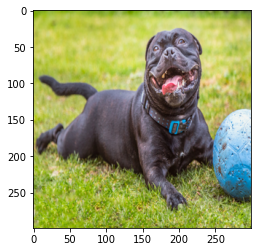

Filename: 1800x1200_dog_cool_summer_other.jpg
Displaying the top 5 Predictions for above image:
n02093256 Staffordshire bullterrier, Staffordshire bull terrier
n04254680 soccer ball
n02110958 pug, pug-dog
n02093428 American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier
n03134739 croquet ball


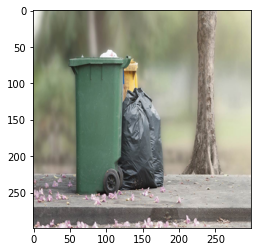

Filename: banner-small-garbage-day_402x-1.jpg
Displaying the top 5 Predictions for above image:
n02747177 ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin
n03958227 plastic bag
n04049303 rain barrel
n03710193 mailbox, letter box
n04235860 sleeping bag


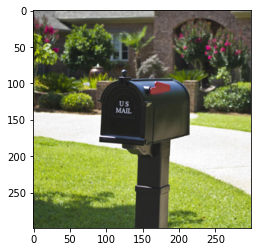

Filename: blacks-postal-pro-post-mount-mailboxes-pp1000blm-31_1000.jpg
Displaying the top 5 Predictions for above image:
n03710193 mailbox, letter box
n01855672 goose
n01514859 hen
n02017213 European gallinule, Porphyrio porphyrio
n07768694 pomegranate


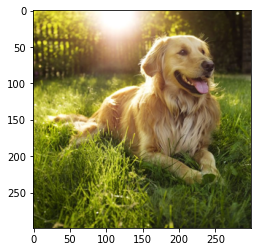

Filename: golden-retriever-royalty-free-image-506756303-1560962726.jpg
Displaying the top 5 Predictions for above image:
n02099601 golden retriever
n04409515 tennis ball
n02099712 Labrador retriever
n02101388 Brittany spaniel
n02100877 Irish setter, red setter


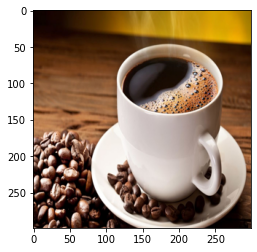

Filename: https _cdn.cnn.com_cnnnext_dam_assets_150929101049-black-coffee-stock.jpg
Displaying the top 5 Predictions for above image:
n07920052 espresso
n07930864 cup
n03297495 espresso maker
n03063599 coffee mug
n03063689 coffeepot


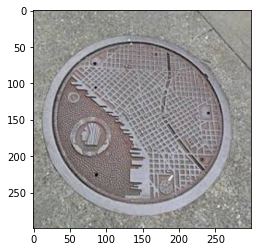

Filename: index.jpg
Displaying the top 5 Predictions for above image:
n03717622 manhole cover
n04039381 racket, racquet
n04355338 sundial
n04409515 tennis ball
n02892201 brass, memorial tablet, plaque


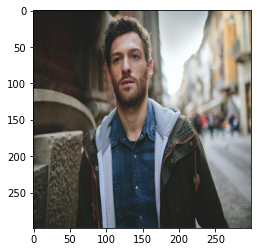

Filename: man-city-urban-walking-serious-732x549-thumbnail.jpg
Displaying the top 5 Predictions for above image:
n04479046 trench coat
n03141823 crutch
n03594734 jean, blue jean, denim
n03891251 park bench
n03787032 mortarboard


In [7]:
for x in predict_output:
    out_list = list(x[1])
    topPredict = sorted(range(len(out_list)), key=lambda i: out_list[i], reverse=True)[:5]
    plt.imshow((((x[2]+1)/2)*255).astype(int))
    plt.show()
    print("Filename:",x[0])
    print("Displaying the top 5 Predictions for above image:")
    for p in topPredict:
        print(class_names[p-1].strip())